In [17]:
"""
IMPORTS
"""
import pandas as pd
import numpy as np
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

### 4.- RECOLLECTING DATAS

In [11]:
df_2020_balanced= pd.read_csv("E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Outcomes\df_2020_balanced.csv",sep=',')
df_urgencias_to_resample = pd.read_csv("E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Outcomes\df_urgencias_to_resample.csv",sep=',')
df_urgencias_resampled=pd.concat([df_urgencias_to_resample,df_2020_balanced], ignore_index=True)
df_urgencias_resampled.head()

,Código Tipo Supuesto Urgente,Código Distrito Centro,Age_range_code,Nationality_code,Sexo_code,year,Quarteryear
0,30.0,11,0,1,1,2021,1.0
1,30.0,11,1,0,1,2021,1.0
2,40.0,5,6,0,1,2021,1.0
3,30.0,15,0,1,0,2021,1.0
4,40.0,10,6,0,1,2021,1.0


### 4.- Exploring Graphics

Vamos a hacer unas gráficas para valorar los datos que disponemos.

Más gráficas en __Tableau__

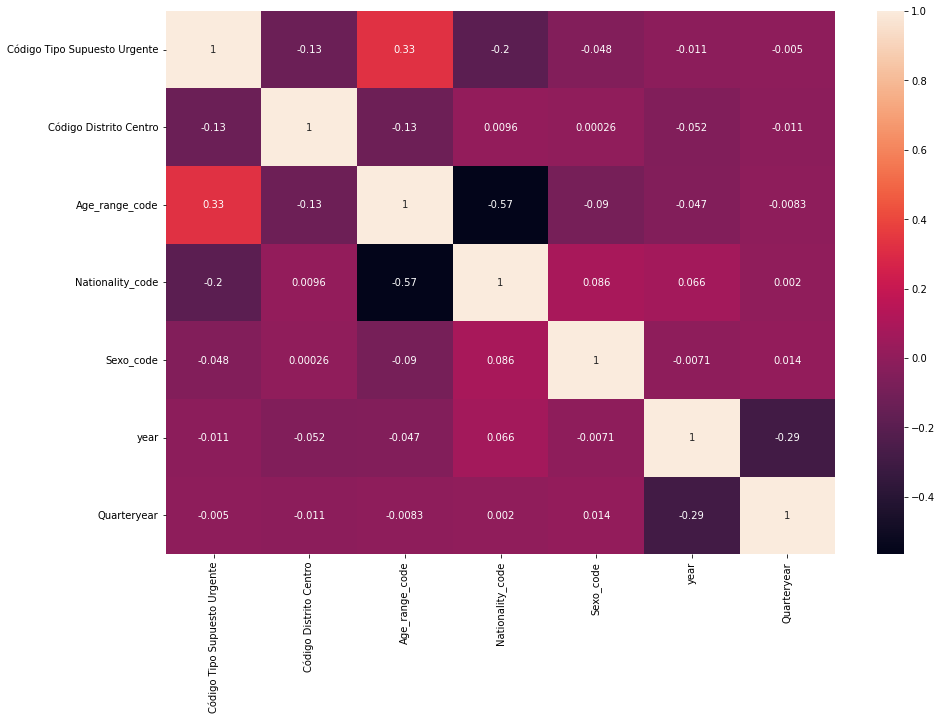

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df_urgencias_resampled.corr(), annot=True);              #Tengo que cambiar los nombres y apuntarlos para corregir

Se observa que hay cierta correlación entre los parámetros de **year**, **Nationality_code**,**Código Distrito Centro**.

También se observa que no hay aparente correlación con los parámetros **Código Tipo Atención**,**Age_range_code** y **Sex_code**.

**year** también parece tener correlación con otros parámetros como **Nationality_code** o **Código Distrito centro**.

**Nationality code** y **Age_range_code** parece que también tiene una cierta correlación.


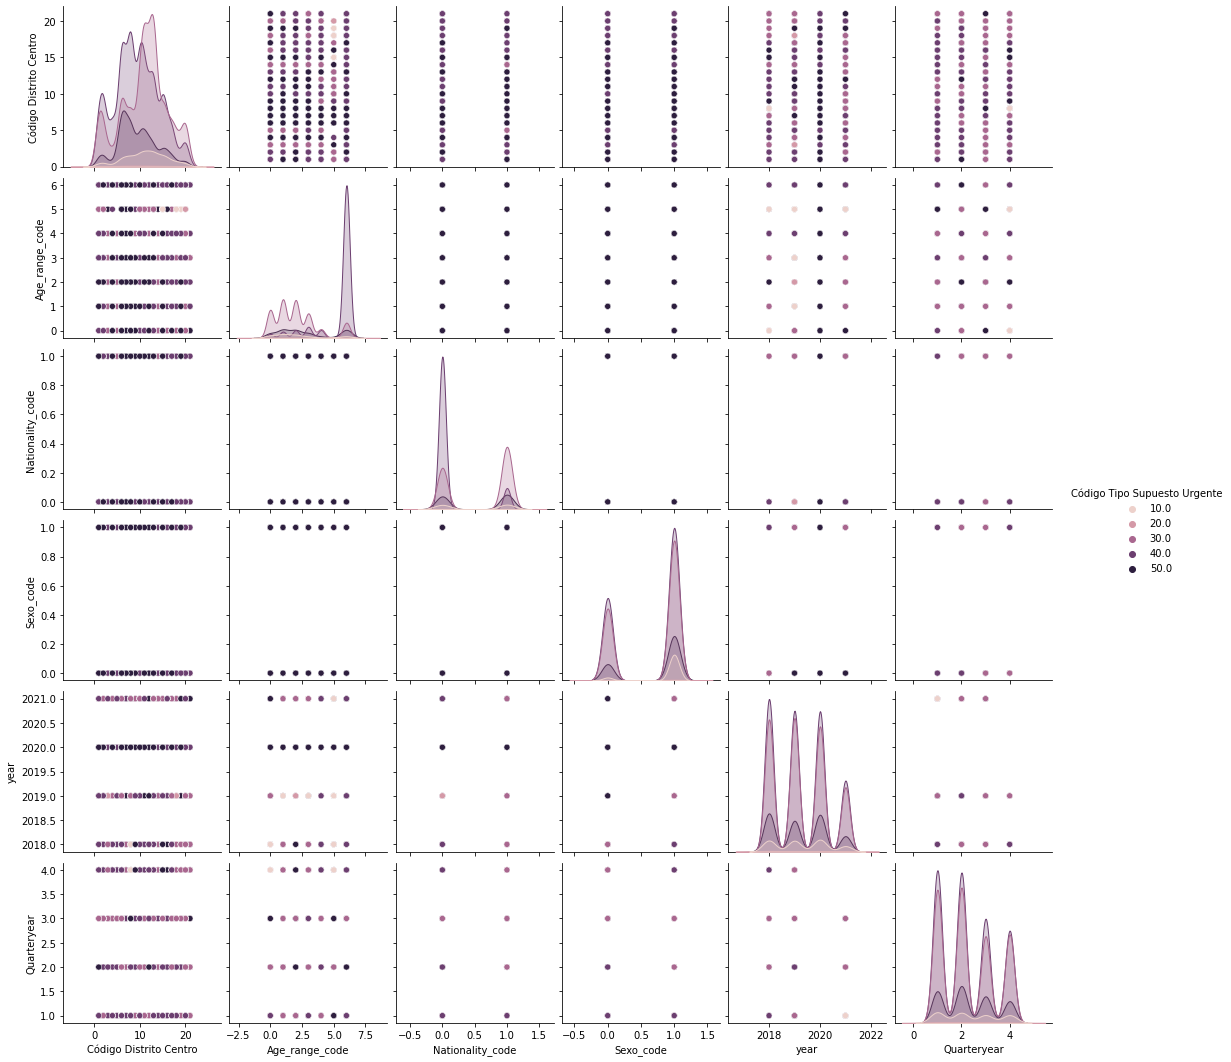

In [15]:
sns.pairplot(df_urgencias_resampled,hue='Código Tipo Supuesto Urgente');

En este **pairplot** se ve claramente que los valores no son continuos, sino discretos.

Hay que tener esto en cuenta a la hora de realizar cualquier análisis y predicción, ya que habrá que hacer __clasificación__.

<Figure size 1080x720 with 0 Axes>

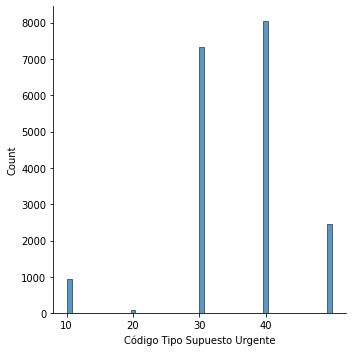

In [18]:
plt.figure(figsize=(15,10))
sns.displot(df_urgencias_resampled['Código Tipo Supuesto Urgente'])
plt.xticks(np.arange(10,50,step=10));

In [19]:
df_urgencias_resampled.to_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Outcomes\df_urgencias_totales_balanced.csv',header=True,index=False)